# Classify whether a person has brain tumor or not by the given greyscale images using CNN and trasfer learning

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
PATH = os.getcwd()

### Here my folder name is data 

In [3]:
DATA_PATH = os.path.join(PATH, 'data')
data_dir_list = os.listdir(DATA_PATH)

In [4]:
print(data_dir_list)

['no', 'yes']


In [5]:
img_rows=224
img_cols=224
num_channel=3


img_data_list=[]
classes_names_list=[]

In [6]:

num_epoch=10
batch_size=64

### Reading the image data from the folder using open CV

In [7]:
import cv2

for dataset in data_dir_list:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(DATA_PATH+'/'+ dataset)
    for img in img_list:
        input_img=cv2.imread(DATA_PATH + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        img_data_list.append(input_img_resize)

Loading images from no folder

Loading images from yes folder



In [8]:
data_dir_list

['no', 'yes']

In [9]:
len(input_img)

357

# Resized image 

In [10]:
len(input_img_resize)

224

In [11]:
type(img_data_list)

list

In [12]:
len(img_data_list)

253

### Here we have 2 classes ,by this inference our final o/p layer should have two neurons

In [13]:
num_classes = len(classes_names_list)
print(num_classes)

2


### We are converting into float as we want values between 0 & 1 ,as after normalization of 0 to 255 we end up with normalized values between the range of 0,1  

### Normalization also removes noise in the data and improves the computation

In [14]:
import numpy as np

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

### We have 253 images of size 224 x 224 and 3 channel  RGB

In [15]:
print (img_data.shape)

(253, 224, 224, 3)


### To extract the input shape and number of samples which will be helpful while passing into a model

In [16]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [17]:
print(num_of_samples)

253


In [18]:
print(input_shape)

(224, 224, 3)


In [19]:
import pandas as pd

### Giving labels to classes ,where 0 he does not have a brain tumor and 1 is he has brain tumor

In [20]:
classes = np.ones((num_of_samples,), dtype='int64')

classes[0:98]=0
classes[98:]=1


### Dummification of target variable before passing into deep neural net(CNN)

In [21]:
from keras.utils import to_categorical

classes = to_categorical(classes, num_classes)

Using TensorFlow backend.


### Here we randomize the two classes so that every batch going through the neural net has both classes in it ,in return the network might learn better 

In [22]:
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=2)

### train and test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
y_test.shape

(51, 2)

In [25]:
y_train.shape

(202, 2)

In [26]:
import matplotlib.pyplot as plt

# Model building

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

### We increase number of  filters(or kernel)in each layer as we go deep into the network ,so that high level features are learnt by the model

In [ ]:
    
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

### Reconstructed CNN which gave me a better accuracy in classification  model-2

In [28]:
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

   
    


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)      

In [31]:
model.layers

In [32]:
model.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.24449812e-01, -7.26803839e-02, -7.63082504e-02,
            4.66222167e-02, -2.81215683e-02, -5.00751212e-02,
           -3.14769819e-02, -4.72525433e-02, -9.63520631e-02,
           -1.15766019e-01, -6.51931390e-02,  5.12812138e-02,
            1.06889829e-01,  1.27031222e-01,  1.84267014e-02,
           -9.74005163e-02,  1.14267960e-01,  1.19728550e-01,
           -8.90851170e-02,  6.34855032e-02,  1.19253263e-01,
            1.17373124e-01,  9.11272317e-02,  1.20412007e-01,
            1.29696578e-02,  5.76912165e-02,  7.49780685e-02,
           -7.71287978e-02,  1.11896470e-01,  6.06213957e-02,
            6.12414926e-02, -5.80255687e-02],
          [-2.35903710e-02, -6.24802634e-02, -4.05357629e-02,
           -1.12571478e-01,  1.05114475e-01,  8.99800658e-02,
            1.21508852e-01,  6.88110292e-02,  1.10556409e-01,
            8.03467929e-02,  9.25505906e-02, -5.02125993e-02,
          

In [33]:
model.layers[0].get_weights()

[array([[[[-1.24449812e-01, -7.26803839e-02, -7.63082504e-02,
            4.66222167e-02, -2.81215683e-02, -5.00751212e-02,
           -3.14769819e-02, -4.72525433e-02, -9.63520631e-02,
           -1.15766019e-01, -6.51931390e-02,  5.12812138e-02,
            1.06889829e-01,  1.27031222e-01,  1.84267014e-02,
           -9.74005163e-02,  1.14267960e-01,  1.19728550e-01,
           -8.90851170e-02,  6.34855032e-02,  1.19253263e-01,
            1.17373124e-01,  9.11272317e-02,  1.20412007e-01,
            1.29696578e-02,  5.76912165e-02,  7.49780685e-02,
           -7.71287978e-02,  1.11896470e-01,  6.06213957e-02,
            6.12414926e-02, -5.80255687e-02],
          [-2.35903710e-02, -6.24802634e-02, -4.05357629e-02,
           -1.12571478e-01,  1.05114475e-01,  8.99800658e-02,
            1.21508852e-01,  6.88110292e-02,  1.10556409e-01,
            8.03467929e-02,  9.25505906e-02, -5.02125993e-02,
            1.37326732e-01, -8.89840722e-02, -1.00146592e-01,
           -1.32068694e-

In [34]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/10
202/202 [==============================] - 18s 91ms/step - loss: 0.7898 - accuracy: 0.4208 - val_loss: 0.6775 - val_accuracy: 0.7647
Epoch 2/10
202/202 [==============================] - 11s 56ms/step - loss: 0.6684 - accuracy: 0.7376 - val_loss: 0.5813 - val_accuracy: 0.7647
Epoch 3/10
202/202 [==============================] - 11s 55ms/step - loss: 0.5752 - accuracy: 0.7673 - val_loss: 0.5145 - val_accuracy: 0.7451
Epoch 4/10
202/202 [==============================] - 12s 58ms/step - loss: 0.5580 - accuracy: 0.7426 - val_loss: 0.5179 - val_accuracy: 0.7647
Epoch 5/10
202/202 [==============================] - 11s 54ms/step - loss: 0.4977 - accuracy: 0.7921 - val_loss: 0.5259 - val_accuracy: 0.7451
Epoch 6/10
202/202 [==============================] - 12s 58ms/step - loss: 0.4529 - accuracy: 0.8267 - val_loss: 0.6269 - val_accuracy: 0.7647
Epoch 7/10
202/202 [==============================] - 11s 57ms/step - loss: 0.4552 - accura

In [35]:
score = model.evaluate(X_test, y_test, batch_size=batch_size)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

51/51 [==============================] - 1s 13ms/step
Test Loss: 0.7369558811187744
Test Accuracy: 0.7058823704719543


In [36]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
print(Y_pred)

[[7.65535593e-01 2.34464452e-01]
 [1.45153776e-01 8.54846239e-01]
 [4.21252288e-02 9.57874715e-01]
 [1.08580910e-01 8.91419053e-01]
 [1.69862583e-01 8.30137372e-01]
 [5.22911072e-01 4.77088988e-01]
 [9.93338108e-01 6.66186539e-03]
 [1.52214542e-01 8.47785413e-01]
 [9.64002192e-01 3.59978676e-02]
 [4.73298654e-02 9.52670097e-01]
 [1.01358943e-01 8.98641109e-01]
 [7.06968084e-03 9.92930353e-01]
 [9.88982618e-01 1.10174101e-02]
 [2.81498373e-01 7.18501627e-01]
 [9.80433762e-01 1.95662435e-02]
 [9.97936845e-01 2.06312328e-03]
 [8.34115297e-02 9.16588485e-01]
 [3.33943553e-02 9.66605663e-01]
 [1.16383344e-01 8.83616686e-01]
 [9.09507513e-01 9.04924572e-02]
 [9.99927878e-01 7.21296019e-05]
 [7.60453567e-02 9.23954606e-01]
 [1.17894560e-01 8.82105470e-01]
 [7.60453567e-02 9.23954606e-01]
 [1.19994402e-01 8.80005658e-01]
 [6.22081161e-01 3.77918750e-01]
 [3.25487971e-01 6.74512029e-01]
 [5.83623111e-01 4.16376859e-01]
 [3.57138366e-01 6.42861664e-01]
 [9.95587230e-01 4.41276887e-03]
 [3.961183

In [37]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 0 0 1 1 0 0 0 0 0 1 0]


In [38]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[12  5]
 [10 24]]


In [39]:
from keras.models import load_model

### for saving the weights alone of the model

In [68]:
# Serialize weights to HDF5
model.save_weights("model.h5")

In [69]:
# Load weights into new model
model.load_weights("model.h5")

### model.save  saves the weights and layers in the model

In [70]:
model.save('model.hdf5')
loaded_model = load_model('model.hdf5')

## image agumentation for improving the robusness of the model 

In [71]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.5, 
    zoom_range=0.4, 
    vertical_flip=True, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True) 

In [72]:

test_data_gen = ImageDataGenerator()

In [73]:
TRN_AUGMENTED = os.path.join(PATH , 'Trn_Augmented_Images')
TST_AUGMENTED = os.path.join(PATH , 'Tst_Augmented_Images')

In [74]:
ftrain_generator = train_data_gen.flow(
        X_train,
        y_train,
        batch_size=batch_size, 
        shuffle=True)

In [75]:
ftest_generator = test_data_gen.flow(
        X_test,
        y_test,
        batch_size=batch_size, 
        shuffle=True)

In [76]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit_generator(ftrain_generator, epochs = num_epoch, validation_data=ftest_generator,validation_steps=25,steps_per_epoch=X_train.shape[0]/batch_size)

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

In [ ]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

# VGG-16 TRASFER LEARNING

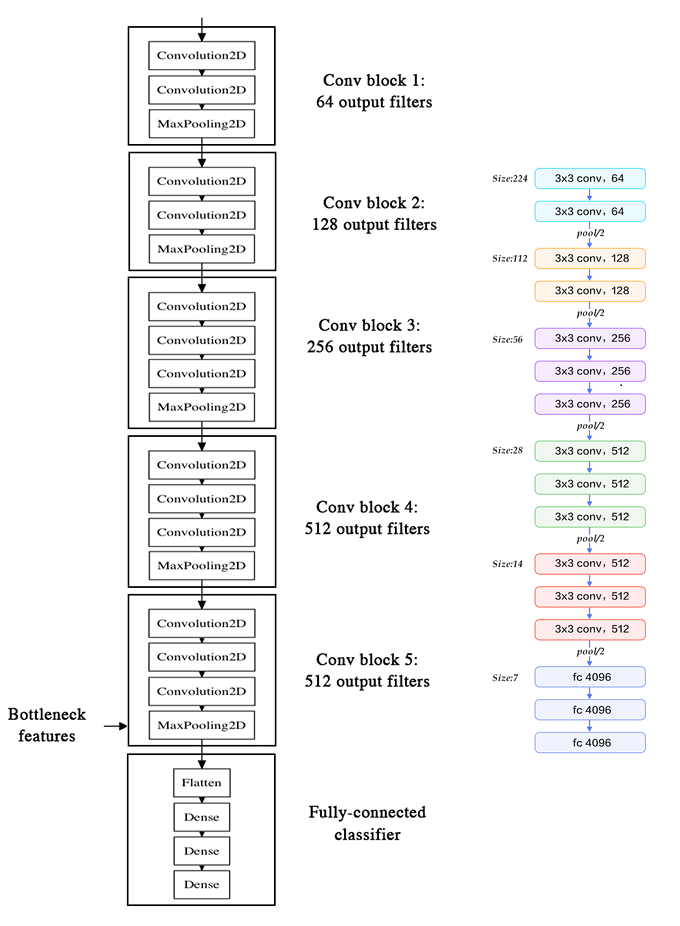

In [48]:
from IPython.display import Image
Image(filename='vgg16.png')

In [44]:
from keras.layers import Input, Dense

In [45]:
image_input = Input(shape=(img_rows, img_cols, num_channel))

In [46]:
from keras.applications.vgg16 import VGG16

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

553467904/553467096 [==============================] - 1922s 3us/step


In [49]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)

In [51]:
from keras.models import Model

custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [52]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [53]:
custom_vgg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
custom_vgg_model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/10
202/202 [==============================] - 71s 350ms/step - loss: 1.0910 - accuracy: 0.5149 - val_loss: 1.0519 - val_accuracy: 0.3333
Epoch 2/10
202/202 [==============================] - 72s 357ms/step - loss: 0.8877 - accuracy: 0.4406 - val_loss: 0.6327 - val_accuracy: 0.6667
Epoch 3/10
202/202 [==============================] - 69s 340ms/step - loss: 0.6615 - accuracy: 0.6188 - val_loss: 0.7408 - val_accuracy: 0.4118
Epoch 4/10
202/202 [==============================] - 69s 341ms/step - loss: 0.6803 - accuracy: 0.4901 - val_loss: 0.5852 - val_accuracy: 0.6667
Epoch 5/10
202/202 [==============================] - 69s 343ms/step - loss: 0.7718 - accuracy: 0.5990 - val_loss: 0.5482 - val_accuracy: 0.7059
Epoch 6/10
202/202 [==============================] - 70s 344ms/step - loss: 0.5901 - accuracy: 0.6436 - val_loss: 0.6873 - val_accuracy: 0.5490
Epoch 7/10
202/202 [==============================] - 70s 347ms/step - loss: 0.5988 -

## model validation accuracy of brain-tumor-detection using trasnfer learning VGG-16

In [55]:
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

51/51 [==============================] - 15s 287ms/step
[INFO] loss=0.5038, accuracy: 82.3529%


In [56]:
Y_train_pred = custom_vgg_model.predict(X_test)

In [57]:
y_train_pred = np.argmax(Y_train_pred, axis=1)
print(y_train_pred)

[1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 1]


In [58]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_train_pred))

[[10  7]
 [ 2 32]]


# Clearly VGG 16 has worked far better than the CNN architecture where CNN val accuracy=70.58 and VGG 16 val accuracy =82.35